<a href="https://www.kaggle.com/code/aakash15071996/border-gavaskar-trophy-eda-1996-2023?scriptVersionId=126362522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/border-gavaskar-trophy-results/BGTresults.csv


# Read the Data Sets

In [2]:
df = pd.read_csv(r'/kaggle/input/border-gavaskar-trophy-results/BGTresults.csv')
df.head()

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
0,1996-97,1,1,Delhi,India,Michael Slater,Australia,44,Anil Kumble,4.0,182/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
1,1996-97,1,2,Delhi,India,Nayan Mongia,India,152,Paul Reiffel,3.0,361/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
2,1996-97,1,3,Delhi,India,Steve Waugh,Australia,67,Anil Kumble,5.0,234/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
3,1996-97,1,4,Delhi,India,Mohd. Azharuddin,India,21,Paul Reiffel,2.0,56/3,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
4,1997-98,1,1,Chennai,India,Navjot Sidhu,India,62,Shane Warne,4.0,257/10,India,179r,Sachin Tendulkar,Mohd. Azharuddin,Mark Taylor,Sachin Tendulkar,India


# Data cleaning & change the Datatype if need.

In [3]:
df.shape

(214, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Test Series Year        214 non-null    object 
 1   Test Number             214 non-null    int64  
 2   Innings                 214 non-null    int64  
 3   Venue                   214 non-null    object 
 4   Host                    214 non-null    object 
 5   Highest Scorer          214 non-null    object 
 6   Team                    214 non-null    object 
 7   Runs by highest scorer  214 non-null    int64  
 8   best bowler             214 non-null    object 
 9   wickets by best bowler  213 non-null    float64
 10  team total              214 non-null    object 
 11  Winner                  214 non-null    object 
 12  Win Margin              214 non-null    object 
 13  MOTM                    214 non-null    object 
 14  Ind captain             214 non-null    ob

# Handling the null values

In [5]:
df.isnull().sum()

Test Series Year          0
Test Number               0
Innings                   0
Venue                     0
Host                      0
Highest Scorer            0
Team                      0
Runs by highest scorer    0
best bowler               0
wickets by best bowler    1
team total                0
Winner                    0
Win Margin                0
MOTM                      0
Ind captain               0
Aus captain               0
MOTS                      0
Series Win                0
dtype: int64

In [6]:
null = df['wickets by best bowler'].isna()
df[null]

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
155,2016-17,1,2,Pune,India,KL Rahul,India,64,Steve O'Keefe,NaN,105/10,Australia,333r,Steve O'Keefe,Virat Kohli,Steve Smith,Ravindra Jadeja',India


In [7]:
df['wickets by best bowler'] = df['wickets by best bowler'].fillna(0)

# Doing EDA Analysis on few Question

In [8]:
win = df['Series Win'].value_counts().reset_index()
win

,index,Series Win
0,India,126
1,Australia,72
2,Drawn,16


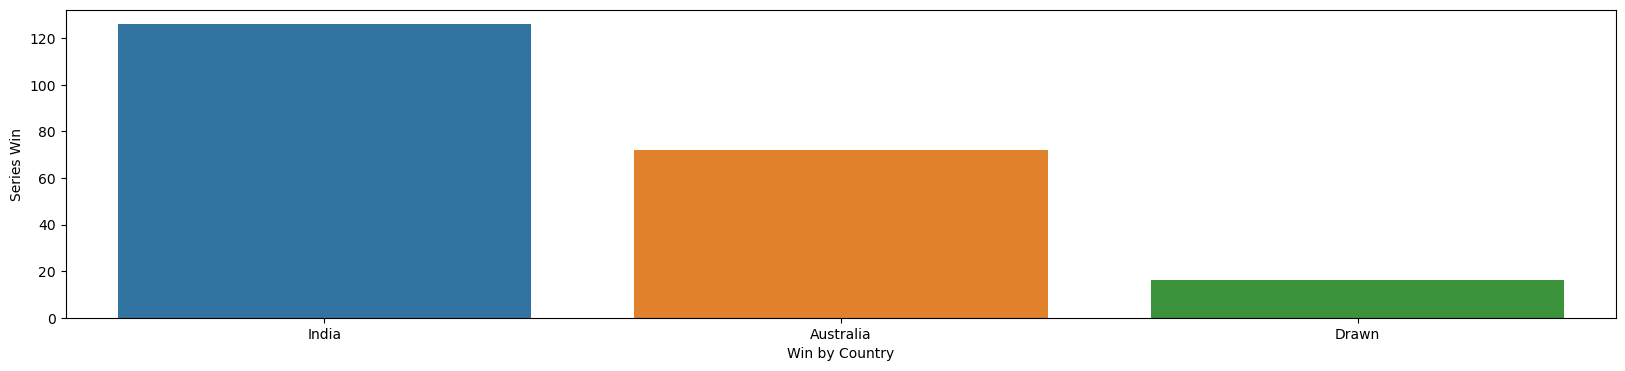

In [9]:
plt.figure(figsize=(20,4))
sns.barplot(data=win,x='index',y='Series Win')
plt.xlabel('Win by Country')
plt.show()

# India has won the most BGT series than Australia

In [10]:
best_bowler = df.groupby('best bowler')['wickets by best bowler'].sum().reset_index().sort_values('wickets by best bowler',ascending=False)
best_bowler

,best bowler,wickets by best bowler
5,Anil Kumble,86.0
35,Nathan Lyon,77.0
15,Harbhajan Singh,65.0
43,Ravichandran Ashwin,61.0
44,Ravindra Jadeja,52.0
29,Mitchell Johnson,35.0
57,Zaheer Khan,29.0
23,Josh Hazlewood,26.0
7,Ben Hilfenhaus,23.0
14,Glenn McGrath,23.0


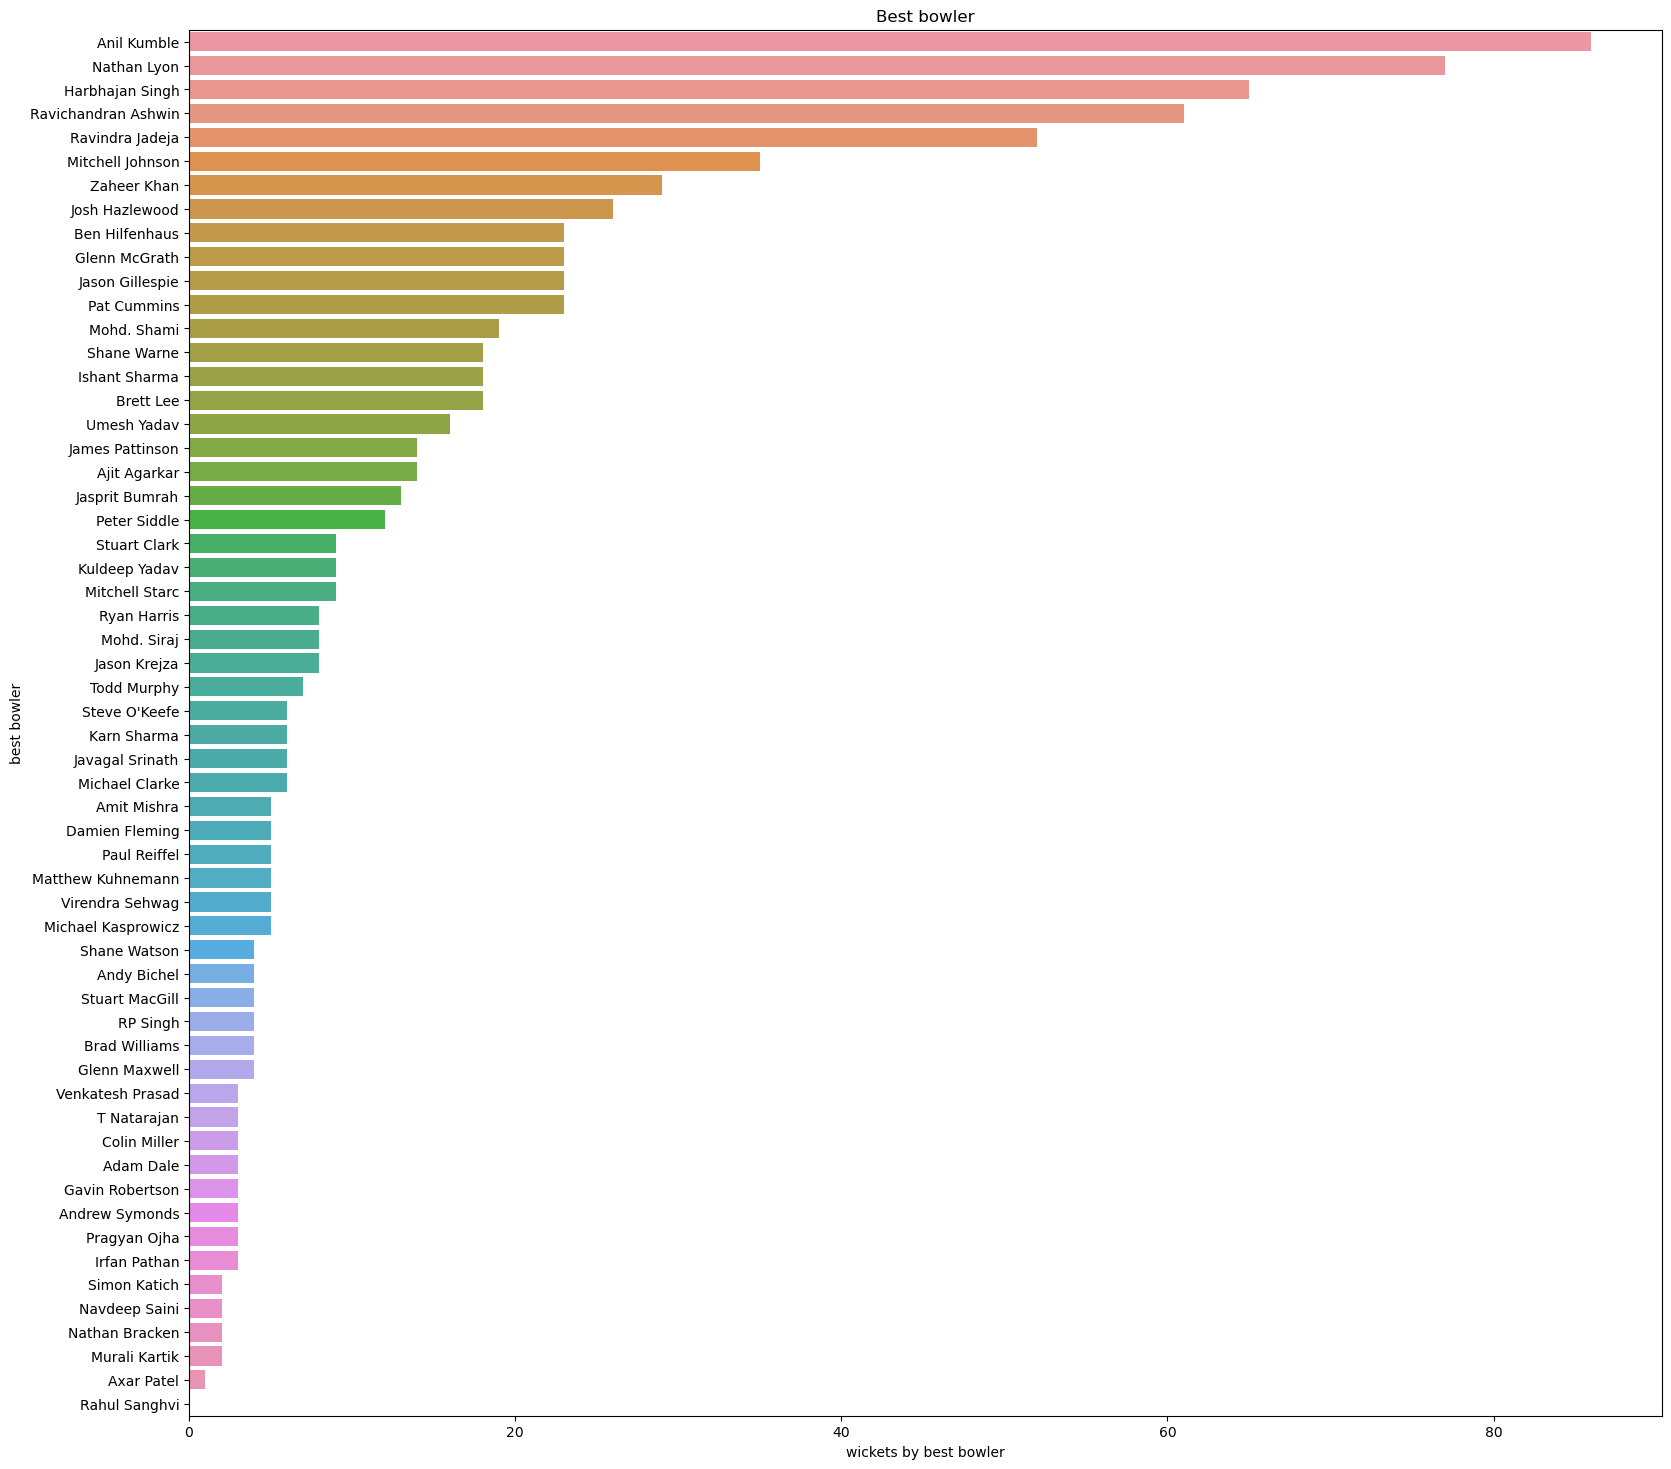

In [11]:
plt.figure(figsize=(19,18))
sns.barplot(data=best_bowler,x='wickets by best bowler',y='best bowler')
plt.title('Best bowler')
plt.show()

# Top 3 Best bowler perform in BGT Series in all time

* Anil Kumble
* Nathan Lyon
* Harbajan Singh

In [12]:
df.groupby('Ind captain')['Winner'].count().reset_index()


,Ind captain,Winner
0,Ajinkya Rahane,16
1,Anil Kumble,23
2,MS Dhoni,53
3,Mohd. Azharuddin,10
4,Rahul Dravid,8
5,Rohit Sharma,14
6,Sachin Tendulkar,15
7,Sourav Ganguly,36
8,Virat Kohli,38
9,mohd. Azharuddin,1


<AxesSubplot:xlabel='Ind captain'>

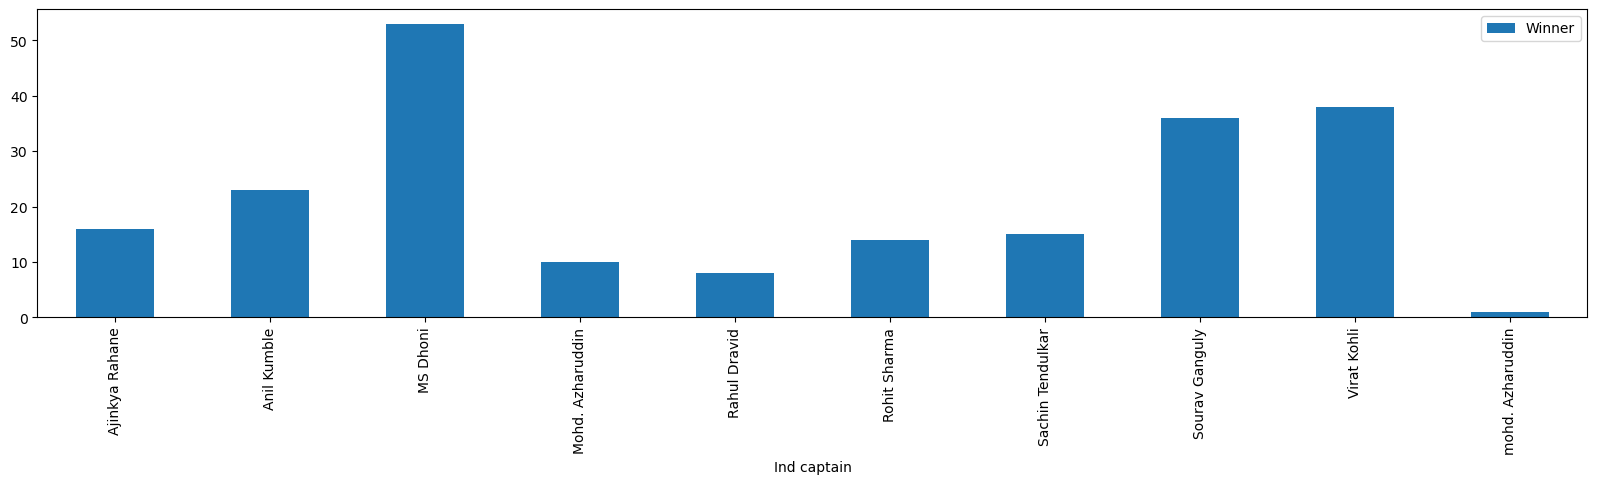

In [13]:
df.groupby('Ind captain')['Winner'].count().reset_index().plot.bar(x='Ind captain', y='Winner',figsize=(20,4) )

# India most won the BGT series under MS Dhoni (53)

In [14]:
df.groupby('Aus captain')['Winner'].count().reset_index()

,Aus captain,Winner
0,Adam Gilchrist,12
1,Mark Taylor,15
2,Michael Clarke,33
3,Pat Cummins,7
4,Ricky Ponting,43
5,Steve Smith,34
6,Steve Waugh,39
7,Tim Paine,31


<AxesSubplot:xlabel='Aus captain'>

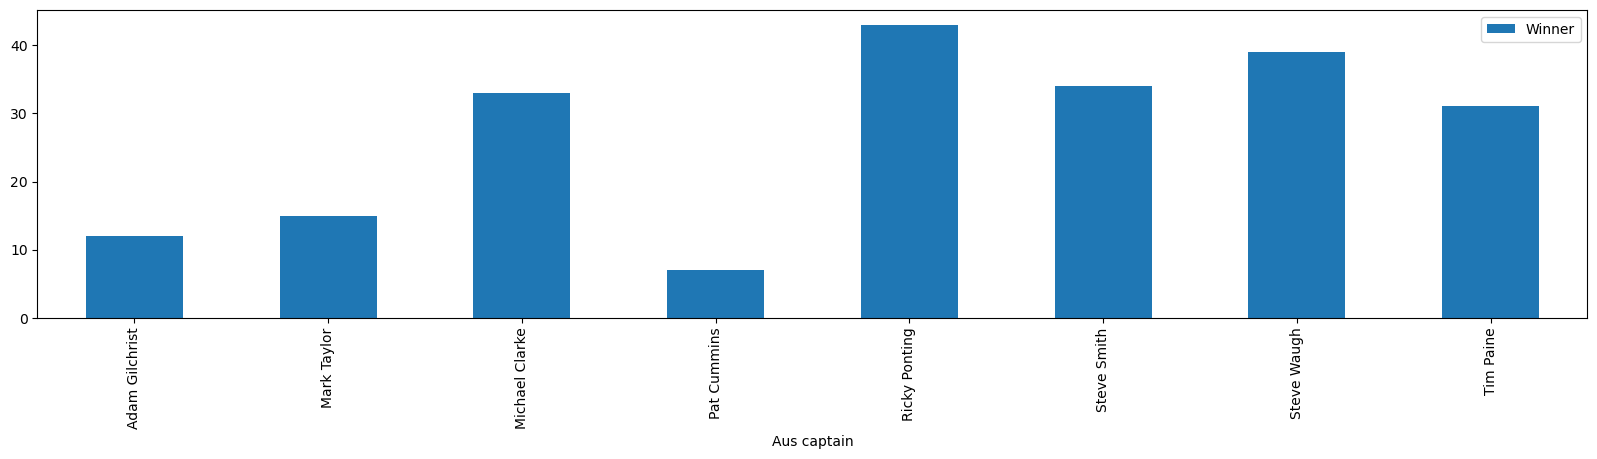

In [15]:
df.groupby('Aus captain')['Winner'].count().reset_index().plot.bar(x='Aus captain', y='Winner',figsize=(20,4) )

# Australia most won BGT Series under Ricky Ponting 43

In [16]:
df['Win Margin'].value_counts()

0        44
8w       20
6w       12
7w        8
9w        8
4w        8
122r      8
10w       4
320r      4
3w        4
137r      4
146r      4
31r       4
75r       4
333r      4
48r       4
298r      4
171r      4
172r      4
1w        4
72r       4
179r      4
337r      4
13r       4
342r      4
217r      4
285r      4
180r      4
2w        4
68ri      3
37ri      3
135ri     3
219ri     3
141ri     3
132r      3
Name: Win Margin, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Win Margin'>

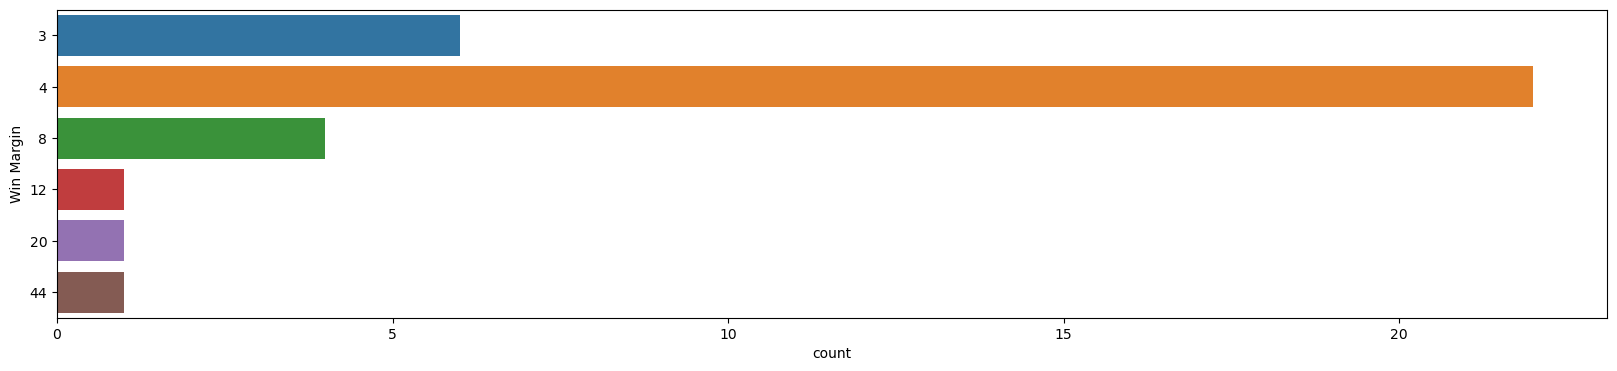

In [17]:
plt.figure(figsize=(20,4))
sns.countplot(y=df['Win Margin'].value_counts())

In [18]:

motm = df['MOTM'].value_counts().reset_index()
motm


,index,MOTM
0,Sachin Tendulkar,19
1,Ravindra Jadeja,15
2,Cheteshwar Pujara,13
3,Steve Smith,12
4,Nathan Lyon,12
5,VVS Laxman,8
6,Zaheer Khan,8
7,Matthew Hayden,8
8,MS Dhoni,8
9,Michael Clarke,7


<AxesSubplot:title={'center':'Best Man of the Match in BGT Series'}, xlabel='MOTM', ylabel='index'>

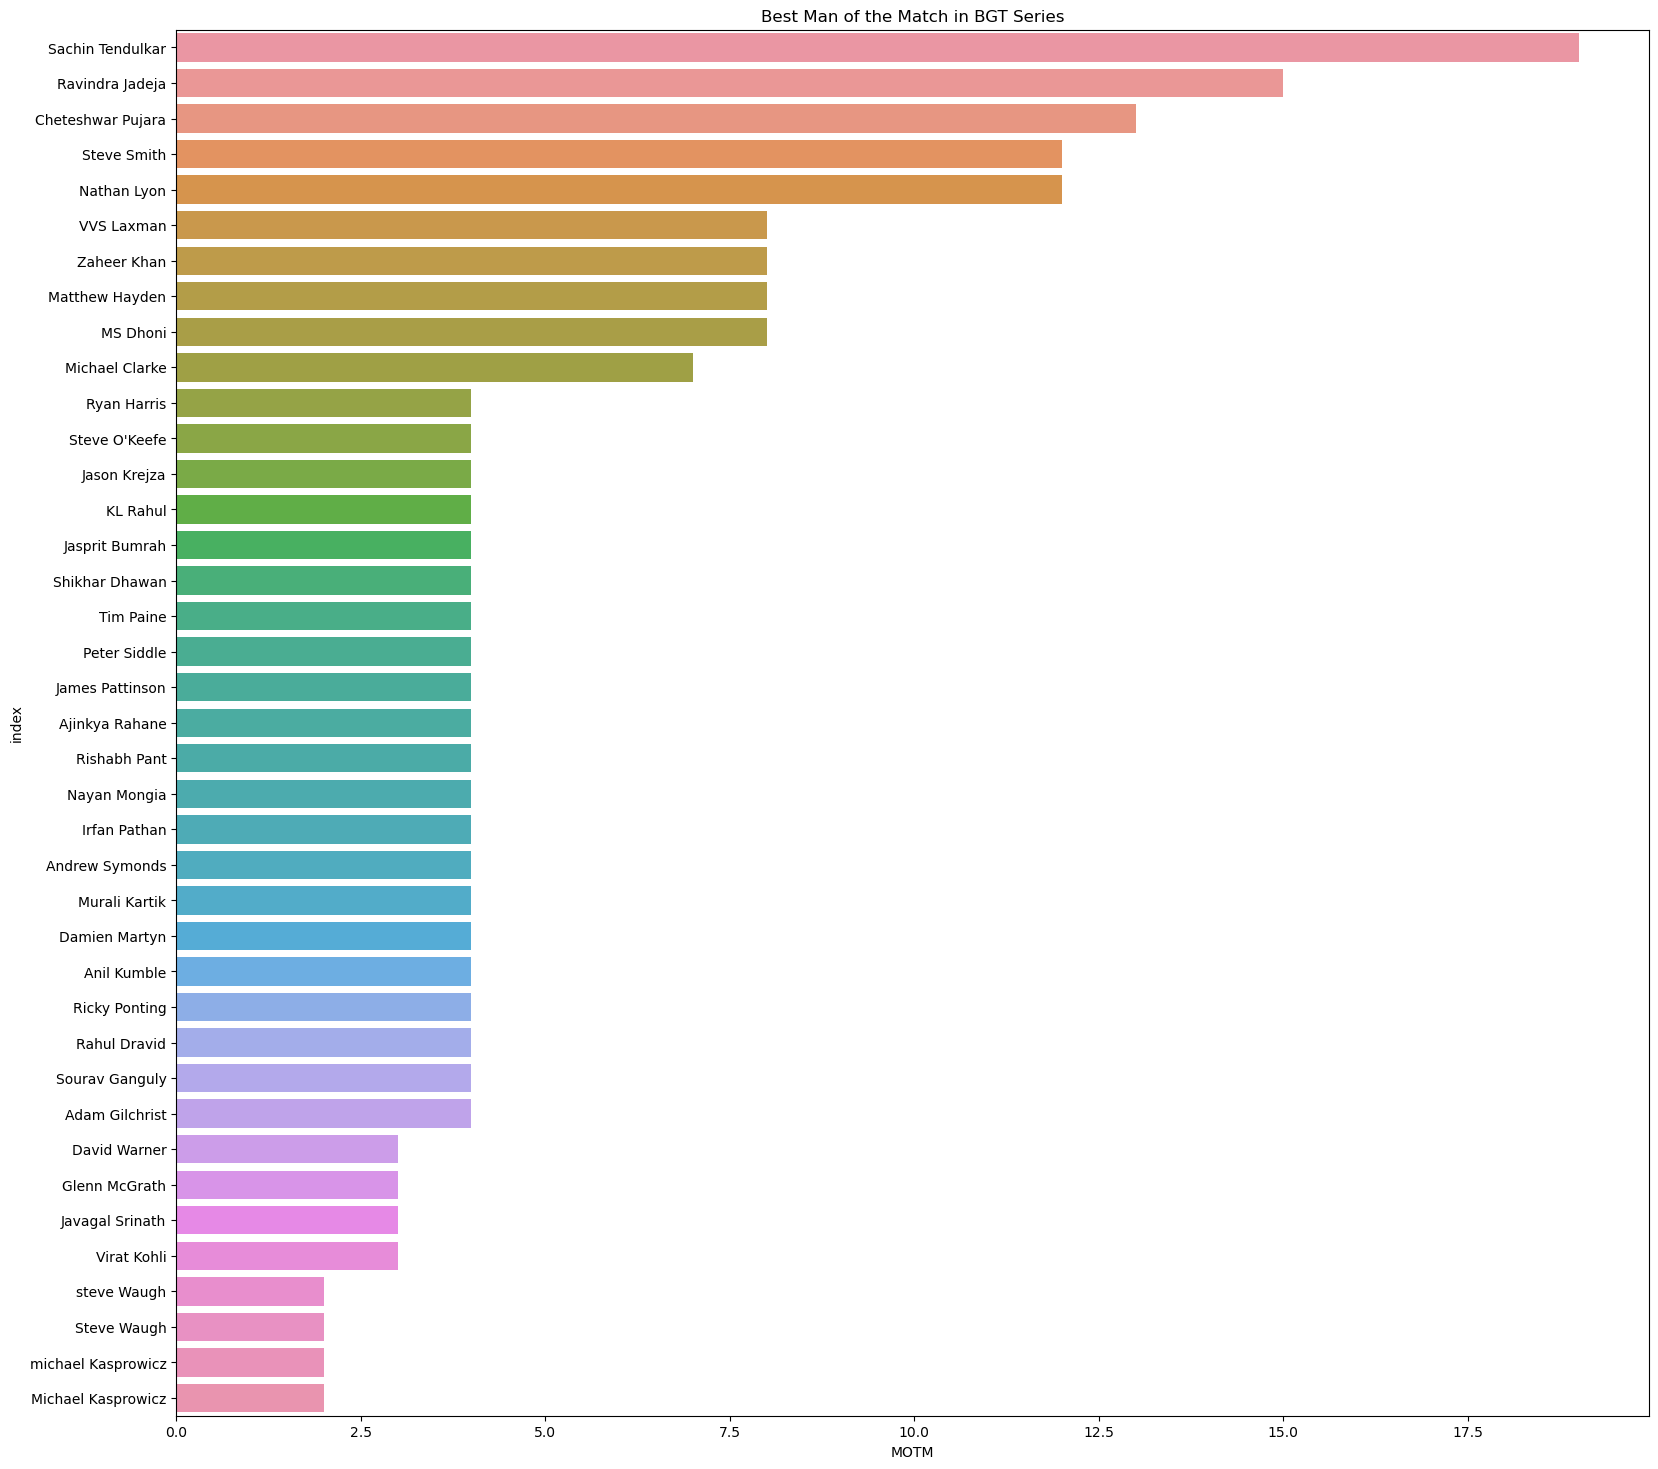

In [19]:
plt.figure(figsize=(19,18))
plt.title('Best Man of the Match in BGT Series')
sns.barplot(data=motm,y='index',x='MOTM')

# Top 3 most Man of the Match won in BGT Series alltime.

* Sachin Tendulakar- 19
* Ravindra Jadeja- 15
* Cheteshwar Pujara- 13

In [20]:
mot_count = df.groupby('Team')['MOTS'].count().reset_index()
mot_count

,Team,MOTS
0,Australia,108
1,India,106


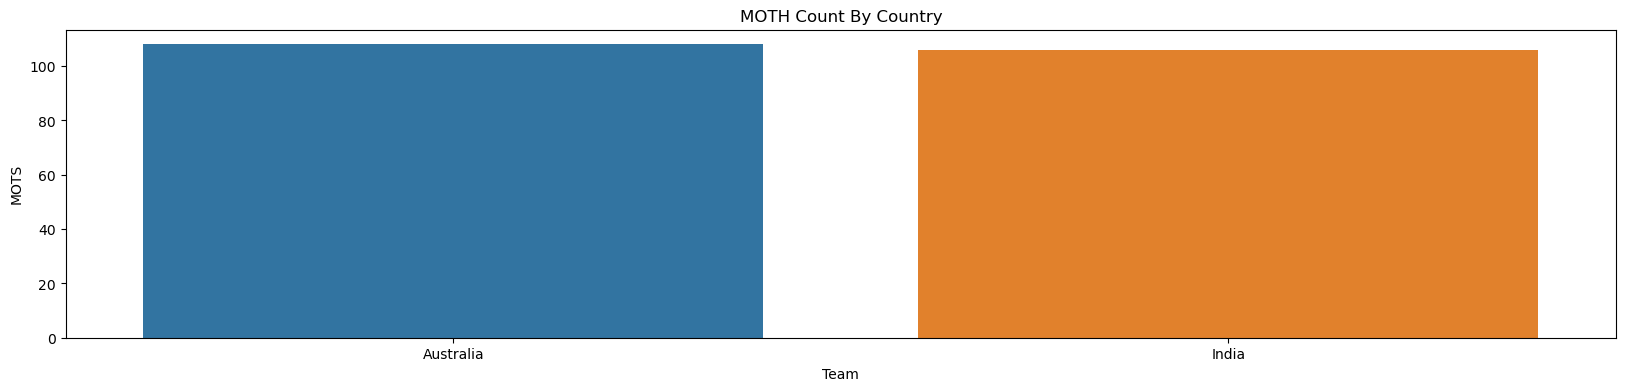

In [21]:
plt.figure(figsize=(20,4))
sns.barplot(data=mot_count,x='Team',y='MOTS')
plt.title('MOTH Count By Country')
plt.show()

Autralia has won highest Man of the match than India.